## Importing relevant Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [25]:
!pip install seaborn

In [3]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
Y_train[0]

5

In [9]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

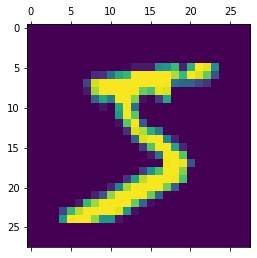

In [10]:
plt.matshow(X_train[0])

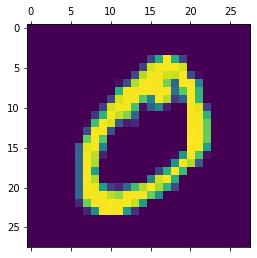

In [11]:
plt.matshow(X_train[1])

## Scaling our Data

In [12]:


X_train = X_train / 255
X_test = X_test / 255


## Designing  A nueral Network without hidden Layer

In [13]:
#flatenning

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened.shape

(10000, 784)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7187 - accuracy: 0.8141
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.9128
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2908 - accuracy: 0.9187
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2643 - accuracy: 0.9262


In [17]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2665 - accuracy: 0.9256


[0.26648303866386414, 0.925599992275238]

In [18]:
Y_predict = model.predict(X_test_flattened)

In [19]:
Y_predict[0]

array([1.4717907e-02, 2.5720772e-07, 4.6694428e-02, 9.2906481e-01,
       1.6165674e-03, 8.2625568e-02, 1.1365835e-06, 9.9972355e-01,
       7.4155897e-02, 5.7949257e-01], dtype=float32)

In [20]:
np.argmax(Y_predict[0])

7

In [21]:
Y_predict_labels = [np.argmax(i) for i in Y_predict]

In [22]:
Y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    5,    9,    3,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    8,  926,   17,    7,    3,   13,   11,   40,    2],
       [   1,    0,   19,  922,    0,   24,    2,   13,   23,    6],
       [   1,    1,    4,    2,  917,    0,   10,    5,   12,   30],
       [   7,    3,    3,   38,    9,  773,   13,    7,   33,    6],
       [   9,    3,    7,    1,    7,   10,  916,    2,    3,    0],
       [   1,    5,   24,    7,    5,    0,    0,  958,    4,   24],
       [   4,    8,    6,   21,    9,   23,    9,   13,  876,    5],
       [  10,    7,    1,   11,   30,    6,    0,   34,    9,  901]])>

Text(69.0, 0.5, 'Truth')

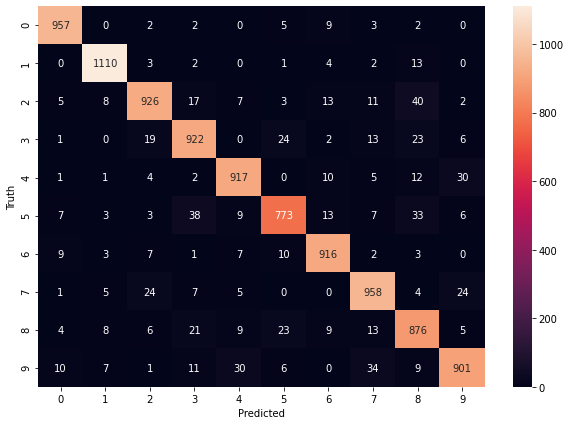

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Nueral Network with hidden layer

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4509 - accuracy: 0.8742
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1379 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0521 - accuracy: 0.9841


In [29]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0831 - accuracy: 0.9751


[0.08307832479476929, 0.9750999808311462]

In [30]:
Y_predict_1 = model.predict(X_test_flattened)

In [31]:
Y_predict_1[0]

array([5.0724208e-02, 1.6725063e-04, 3.1506330e-01, 9.0634680e-01,
       5.4008131e-05, 2.2862852e-03, 2.5428428e-06, 9.9998450e-01,
       7.2018266e-02, 1.1728141e-01], dtype=float32)

Text(69.0, 0.5, 'Truth')

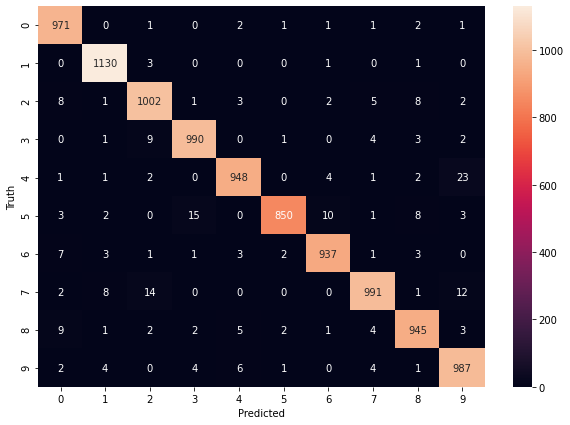

In [32]:
y_predicted_labels = [np.argmax(i) for i in Y_predict_1]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')